# Hudson Arney
## Introduction: 
In this lab I will get a refresher on using many computer science tools that I have learned throughout my classes at MSOE. Experiment 1 will go over setting up a jupyter environment and making sure I have access to ROSIE for future labs. In Experiment 2 I will be going over many common python libraries, some of these include numpy, matplot, scipy stats and more. These concepts will be tested using the IRIS dataset which has columns describing specific flower features such as length and width of both the pedals and sepal. Lastly in Experiment 3 I will get a deeper dive into matrices and vectors using numpy, as well as refreshing my knowledge in linear algebra.


# Lab 01 - Linear Algebra and Numpy

Welcome to the first lab in CSC4601/5601! If you can edit this you probably have a working instance of jupyter notebook (either locally or on Rosie). If you are looking at this as an pdf, maybe you still need to get an instance of Jupyter running. Please follow the neccessary steps in Experiment 1.

# Experiment 1

In this experiment you will be making sure that you can connect to Rosie and run an interactive session (jupyter notebook session). You should have an account on Rosie from a previous class, but if you have a new account (or haven't used yours in so long that your password has expired) you will have to reset your password. Ask your instructor or the Rosie administrator for the default password. To do this you will have to access the terminal on Rosie - meaning you will have to ssh in. Once you have reset your password, you will be able to access Rosie's web portal and initiate interactive session from there. The following steps and sections will give you what you need to start.

## Local Alternative to Rosie

For some labs you may want to run everything locally. Although you lack Rosie's amazing computing power,
this can be easier and more flexible for development, small jobs, etc. One method to set up an appropriate environment on your Windows laptop is:

1. Install Anaconda
1. Open an Anaconda Prompt
1. `conda create -n csc4601 python jupyter numpy ipython scipy matplotlib pandoc`
1. `conda activate csc4601`
1. `copy username_lab01_stub.ipynb yourUsername_lab01.ipynb`
1. `jupyter notebook`
1. ctrl-c from the console to stop the jupyter server

You should also [install MiKTeX](https://miktex.org/download). Among other things, it is required to use the File | Save and Export Notebook as… | PDF option if the notebook contains LaTeX markup, as they often do when including equations (such as in this file).

## Accessing Rosie
An objective of this class is to give you some more experinece using remote resources and Rosie is a great resource to have. Our admin is Dr. Retert. Please refer to Rosie's [webpage](https://docs.hpc.msoe.edu/) as a first step in finding solutions to issues you may be having. Your instructor is also a good resource if troubleshooting is required.

### SSH Client
If you are on Windows, you will have to download and install an ssh client. A commonly used and free client is [Putty](https://www.putty.org/). Please follow the link and install Putty on your machine.

### On network or off
If you are doing these steps off-campus, you will need to use [MSOE's VPN](https://vpn.msoe.edu/) to access the network that ROSIE is on. To do this you can follow the written instruction on [Rosie User Guide – Network Access](https://docs.hpc.msoe.edu/#/access). 

### Starting an Interactive session
Once you have access to Rosie's network and you have a username and current password (done through the SSH client), you can  complete the steps for starting an interactive session. You should access [ROSIE's web portal](http://dh-ood.hpc.msoe.edu/) and start a jupyter notebook session to run (and complete) this notebook.

# Experiment 2 - Structuing your Data and Feature Matrices / Slicing
In this experiment you will refamiliarize yourself with python/numpy and use some of the common data manipulation techniques that you will need for the rest of the class.

## What is Numpy?
- Matrix library
- Memory-efficient data structures -- arrays
    - Used in scikit-learn, matplotlib, and others
- Expressive API for indexing and operations
- Time-efficient algorithms
    - Calls C and Fortran libraries where possible
    
## How Do I Import Libraries into my Jupyter Notebook working kernel?
- The following bit of code can be used to import libraries. The world is your oyster!

In [1]:
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
datapath = '/data/cs3400/datasets/IRIS.csv' # if running on Rosie
#datapath = './IRIS.csv' # if running locally

## How to read in files, organize data, and plot some features!
In the first step you will read the IRIS.csv file that you are given (which is also on our class's datashare on ROSIE) and put the features into a matrix. In machine learning the standard for organizing matrices is always observations in rows, and features that describe the observations as columns. Read in the data file and assign the data to a numpy matrix.

1. Use the function [numpy.loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html).
    - You will want to use the proper delimiter for the file you have.
    - Make sure that you skip any text rows, numpy matrices can only be a single datatype.
    - Depending on the dataset you may need to specify what columns you want to use.
    - With your data matrix you should explore the data a bit.
2. Use `data.shape` to find your dimensions
3. Plot the first two features your data using matplotlib. Label all of your axes and use legends!
    1. Make a figure with a line plot
    2. Make another figure with a scatter plot
    3. Make a third figure displaying both the same line and scatter plots.
4. Print all of the feature values for the 150th observation in your dataset.
5. Select observations 49-52 from your dataset and print them to the notebook.
6. Select all of the entries in your dataset that have their first feature <= 5 and print the first 5 results. (hint: do this in multiple steps. First make a boolean mask of your matrix)
7. Calculate the median, standard deviation, and mode of the entries selected in the previous step. (Hint 1: these should be done column by column. Hint 2: Don't forget about other packages like scipy!)

### 1) Load the IRIS.csv file into a numpy matrix named `data`

In [2]:
usecols = list(range(4)) # We skip the last column because it is non-numerical
data = np.loadtxt(datapath, delimiter=',', skiprows=1, usecols=usecols) # skip the header row

### 2) Display its dimensions (`data.shape`)

In [3]:
data.shape

(150, 4)

### Plot the first two features of your data using matplotlib. Label all of your axes and use legends!

### 3-A) Make a line plot of the first two dimensions using matplotlib
You may find the [beginner's cheatsheet](https://matplotlib.org/cheatsheets/_images/handout-beginner.png) from https://matplotlib.org/ useful.

In [4]:
sepal_length = data[:, 0] # Feature 1
sepal_width = data[:, 1] # Feature 2

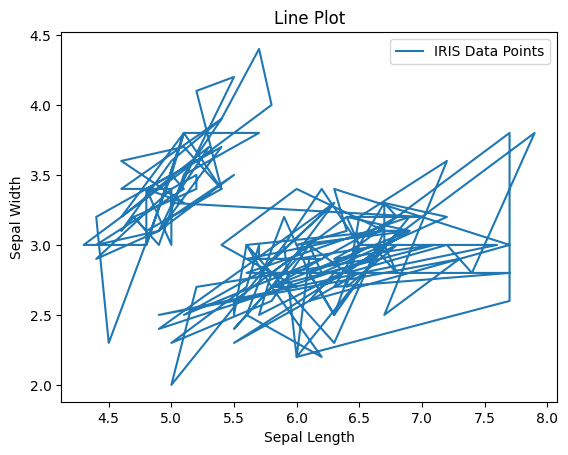

In [5]:
plt.plot(sepal_length, sepal_width, label="IRIS Data Points")
plt.title("Line Plot")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

### 3-B) Make a scatter plot of the first two dimensions using matplotlib
Hint: One way to turn the lines connecting points off is to set the linestyle in [plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to 'none'.

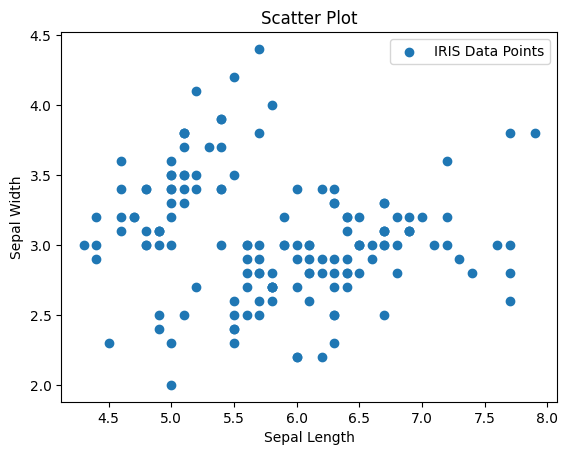

In [6]:
plt.scatter(sepal_length, sepal_width, label="IRIS Data Points")
plt.title("Scatter Plot")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

### 3-C) Make a third figure displaying 2 subplots: both the above line and scatter plots
One way to do this is with the [subplot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) function, which lets you have a grid of subplot axes within a single figure.

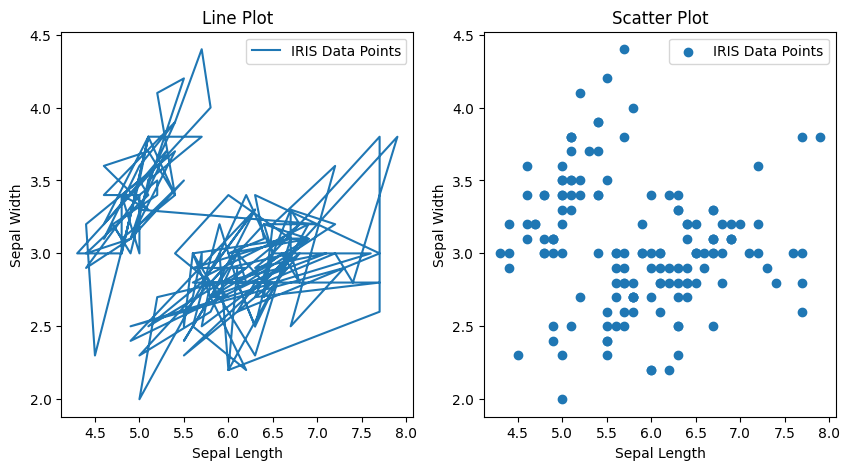

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(sepal_length, sepal_width, label="IRIS Data Points")
plt.title("Line Plot")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(sepal_length, sepal_width, label="IRIS Data Points")
plt.title("Scatter Plot")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

 ### 4) Print all of the feature values for the 150th observation in your dataset.
 Since this is the final row in the dataset, you may also index it as -1. Remember that negative indexes work backward from one past the final element.

In [8]:
print("Feature values for the 150th observation:")
print(data[-1, :])

Feature values for the 150th observation:
[5.9 3.  5.1 1.8]


### 5) Select observations 49-52 from your dataset and print them to the notebook.
Since there are 4 integers between 49 and 52 inclusive, this means 4 observations. Make sure you index the array correctly

In [9]:
print("Feature values for 49-52:")
print(data[48:52, :])

Feature values for 49-52:
[[5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]]


### 6) Select all of the entries in your dataset that have their first feature <= 5 and print the first 5 results (Hint: Do this in multiple steps. First make a [boolean mask](https://numpy.org/doc/stable/user/basics.indexing.html#boolean-array-indexing) of your matrix)

In [10]:
mask = data[:, 0] <= 5
selected_rows = data[mask, :]
print("Selected entries where the first feature <= 5 (first 5 results):")
print(selected_rows[:5, :])

Selected entries where the first feature <= 5 (first 5 results):
[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [4.6 3.4 1.4 0.3]]


### 7) Calculate the median, standard deviation, and mode of the entries selected in the previous step.
Hints:
1. You may need NumPy for [some](https://numpy.org/doc/stable/reference/generated/numpy.median.html) of these and [SciPy](https://docs.scipy.org/doc/scipy/reference/stats.html#summary-statistics) for others.
2. These should be done column by column.

In [11]:
median = np.median(selected_rows, axis=0)
stdv = np.std(selected_rows, axis=0)
mode, counts = stats.mode(selected_rows, axis=0, keepdims=True)

In [12]:
print("Median values:")
print(median)

Median values:
[4.85 3.1  1.45 0.2 ]


In [13]:
print("Standard deviation values:")
print(stdv)

Standard deviation values:
[0.21323403 0.38649062 0.77295597 0.34708608]


In [14]:
print("Mode values:")
print(mode)

Mode values:
[[5.  3.  1.4 0.2]]


# Experiment 3 - Linear Algebra in Numpy
In this experiment you will be performing a number of linear algebra operations in your jupyter notebook. Check out the linalg module of numpy!

We have started by creating a few vectors and matrices for you.

You will:
1. Create a few more numpy vectors and matrices
2. Print the number of dimensions each of your numpy vectors and matrices
3. Print the shape (length and dimension) of each of your numpy vectors and matrices
4. Print the datatype used in each of your numpy vectors and matrices
5. Try to compute a dot product on two matrices of with disagreeable dimensions
6. Compute a dot product on two matrices with agreeable dimensions
7. Try to compute element-wise addition on two matrices with disagreeable dimensions
8. Compute an element-wise addition on two matrices with agreeable dimensions
9. Compute the norm (distance) between a vector and itself
10. Compute the norm (distance) between two different vectors
11. Apply a set of linear coefficients to a matrix of observations.

### 1) Create numpy vectors and matrices (we have done a few for you)

In [15]:
vector_1 = np.array([1, 2, 3])

vector_2 = np.array([4, 5, 6, 7, 8, 9, 10])

matrix_1 = np.array([[11, 12, 13],
                    [14, 15, 16]])

matrix_2 = np.array([[17, 18],
                    [19, 20],
                    [21, 22]])

### 2) Print the number of dimensions each of your numpy vectors and matrices

In [16]:
print("First Vector Number of Dimensions =", vector_1.ndim)

First Vector Number of Dimensions = 1


In [17]:
print("Second Vector Number of Dimensions =", vector_2.ndim)

Second Vector Number of Dimensions = 1


In [18]:
print("First Matrix Number of Dimensions =", matrix_1.ndim)

First Matrix Number of Dimensions = 2


In [19]:
print("Second Matrix Number of Dimensions =", matrix_2.ndim)

Second Matrix Number of Dimensions = 2


### 3. Print the sahpe (length and dimension) of each of your numpy vectors and matrices

In [20]:
print("First Vector Shape =", vector_1.shape)

First Vector Shape = (3,)


In [21]:
print("Second Vector Shape =", vector_2.shape)

Second Vector Shape = (7,)


In [22]:
print("First Matrix Shape =", matrix_1.shape)

First Matrix Shape = (2, 3)


In [23]:
print("Second Matrix Shape =", matrix_2.shape)

Second Matrix Shape = (3, 2)


### 4) Print the datatype used in each of your numpy vectors and matrices

In [24]:
print("First Vector Data Type =", vector_1.dtype)

First Vector Data Type = int64


In [25]:
print("Second Vector Data Type =", vector_2.dtype)

Second Vector Data Type = int64


In [26]:
print("First Matrix Data Type =", matrix_1.dtype)

First Matrix Data Type = int64


In [27]:
print("Second Matrix Data Type =", matrix_2.dtype)

Second Matrix Data Type = int64


### 5) Try to compute a dot product on two matrices of with disagreeable dimensions

In [28]:
dot_product_disagreeable = np.dot(matrix_1, matrix_2.T)
print(dot_product_disagreeable)

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

### 6) Compute a dot product on two matrices with agreeable dimensions

In [29]:
dot_product_agreeable = np.dot(matrix_1, matrix_2)
print(dot_product_agreeable)

[[688 724]
 [859 904]]


### 7) Try to compute element-wise addition on two matrices with disagreeable dimensions

In [30]:
addition_disagreeable = matrix_1 + matrix_2
print(addition_disagreeable)

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

### 8) Compute an element-wise addition on two matrices with agreeable dimensions

In [31]:
addition_agreeable = matrix_1 + matrix_2.T
print(addition_agreeable)

[[28 31 34]
 [32 35 38]]


### 9) Compute the [norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) (distance) between a vector and itself

In [32]:
norm_vector_1 = np.linalg.norm(vector_1)
print("Norm (distance) between first vector and itself:", norm_vector_1)

norm_vector_2 = np.linalg.norm(vector_2)
print("Norm (distance) between second vector and itself:", norm_vector_2)

Norm (distance) between first vector and itself: 3.7416573867739413
Norm (distance) between second vector and itself: 19.261360284258224


### 10) Compute the norm (distance) between two different vectors

In [33]:
norm_vectors_diff = np.linalg.norm(vector_1 - vector_2)

ValueError: operands could not be broadcast together with shapes (3,) (7,) 

In [34]:
vector_3 = [4, 5, 6]
norm_vectors_diff = np.linalg.norm(vector_1 - vector_3)
print("Norm (distance) between first vector and second vector:", norm_vectors_diff)

Norm (distance) between first vector and second vector: 5.196152422706632


### 11) Apply a set of linear coefficients to a matrix of observations.
From your problem set you can see the form of this model:

$$ y = \beta^{12}_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \beta_{3}x_{3} $$

which can also be represented in vector notation as:

$$ y = x^{T}\mathbf{\beta} $$

Use the vectors that you created in problem 5 of problem set 1 and evaluate it here. Evaluate it twice, once using matrix multiplication and once with dot products.

Hints:
1. To create a random vector of length 4, which might be useful for x and $\beta$, use np.random.rand(4)
2. Use np.matmul() for matrix multiplication. (The * operator is *element-wise* multiplication in NumPy. It works with [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) and will give you unxpected results if you're trying to do matrix multiplication.)
3. One way to make a 1-D vector into a 2-D matrix is using the [expand_dims()](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html) function.

In [35]:
beta = np.random.rand(4)
x = np.random.rand(4)

print(beta, "\n", x)

[0.72507694 0.37236132 0.34028021 0.15520912] 
 [0.46369742 0.67699731 0.80156981 0.50759372]


In [36]:
x_matrix = np.expand_dims(x, axis=0)

In [37]:
result_matrix_multiplication = np.matmul(x_matrix, beta)

In [38]:
result_dot_product = np.dot(x, beta)

In [39]:
print("Result using matrix multiplication:", result_matrix_multiplication)
print("Result using dot product:", result_dot_product)

Result using matrix multiplication: [0.93984543]
Result using dot product: 0.9398454338766423


# Bonus Material: Additional Indexing Topics

### Before considering the following indexing procedures, think about the following question. Can I index a vector (nx1) using a matrix (nxm)? What would happen if I try?

Yes, you should be able to index a vector using a matrix in numpy. The result will be a new array where each element is selected from the vector based on the corresponding indices specified by the matrix.

In [40]:
X = np.random.randint(10, size=(10, 3)) 
y = np.expand_dims(np.array([1, 0, 1, 1, 0, 0, 2, 2, 1, 0], dtype=np.int32),axis=1)

### Think of the above matrix, X, as a feature matrix (10x3) and the above vector, y, as a response vector/matrix (10x1). How can I index and get the first index of X or y? 

- To index and get the first row of matrix X, you can use X[0, :]. 
- For the vector y, you can use y[0]

In [41]:
y[0,0]

1

In [42]:
X[0,0]

1

### What if I want multiple elements from this array that are not sequential? Such as element 0 and element 7?
You could create a new array of the indices you want to track, and place that in the given vector or matrix 

In [43]:
print(y[0,0])
print(y[7,0])

1
2


Pretty straighforward, eh? Can I do this in one go?

In [44]:
print(y[[0,7],[0,0]])

[1 2]


Not too shabby! Now, is there anything preventing me from re-indexing the same element? Let's try!

In [45]:
print(y[[7,7],[0,0]])

[2 2]


__woah__

Finally, lets take this to a ridiculous conclusion... What happens if I supply more index calls (as a matrix) than the variable has in shape?

In [46]:
print(y[[7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
